In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy.stats import boxcox
from scipy.stats import stats


In [2]:
kalp = pd.read_csv("heart_disease_uci.csv")
 
kalp.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
kalp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
kalp.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


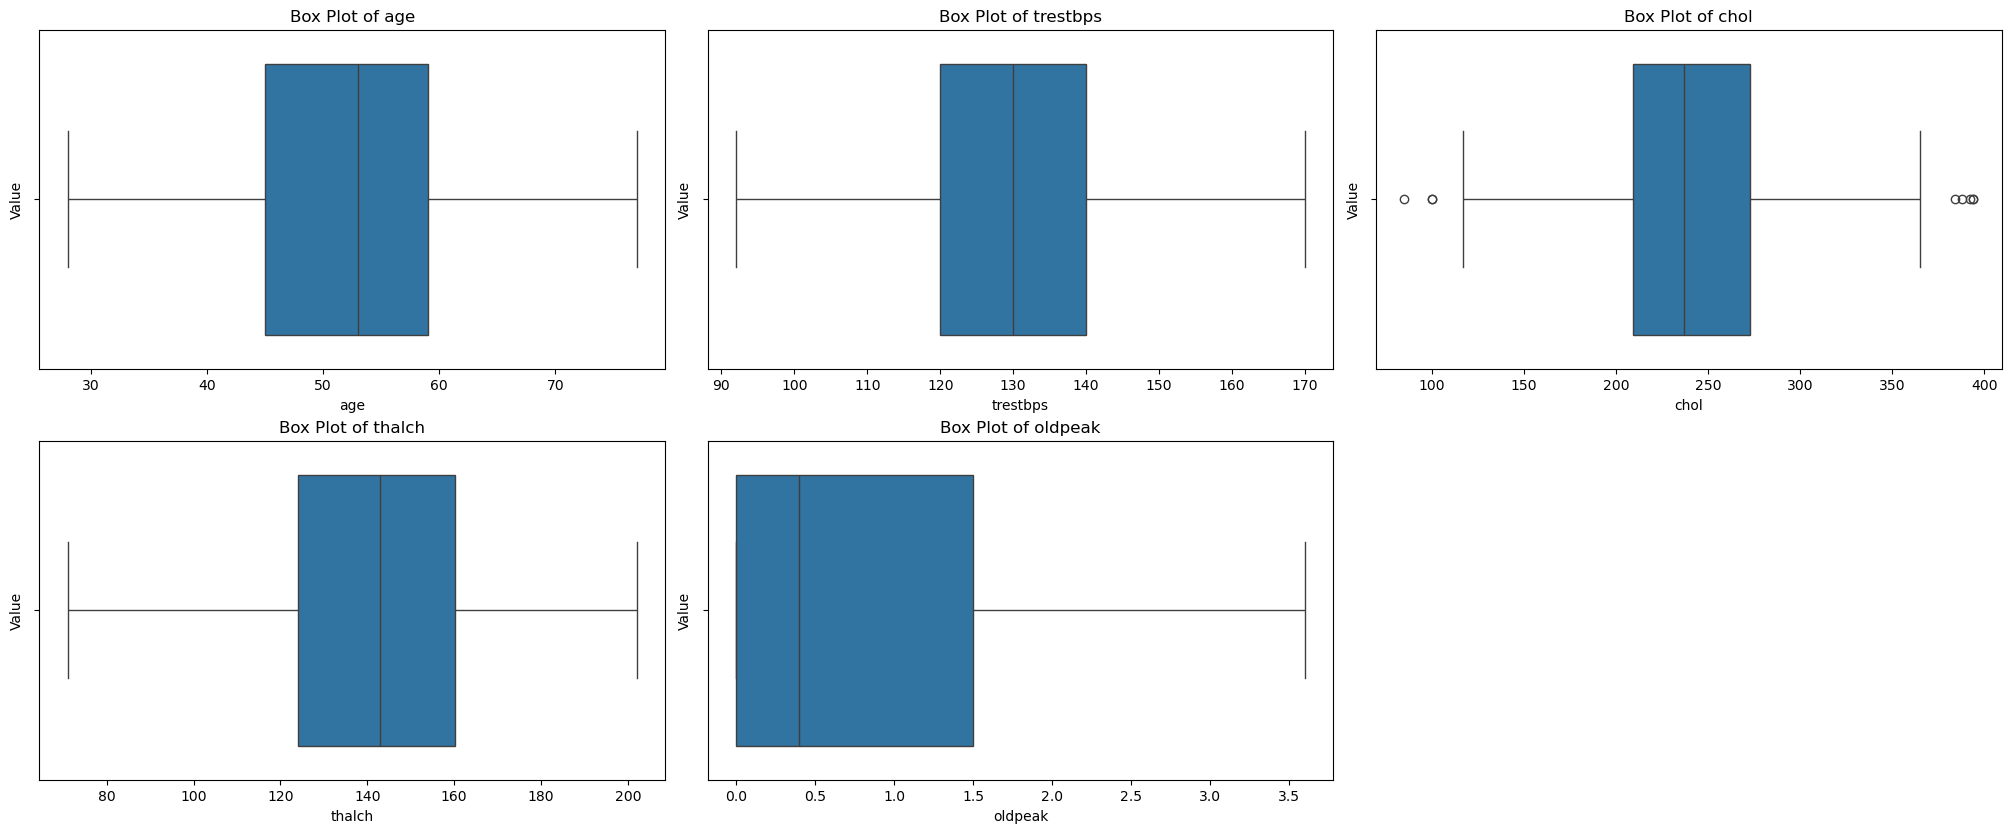

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

df_selected = kalp[columns_to_plot]

num_cols = len(columns_to_plot)
rows = 4
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15), constrained_layout=True)

for i, column in enumerate(columns_to_plot):
    row = i // cols
    col = i % cols
    sns.boxplot(x=df_selected[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')

for i in range(num_cols, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


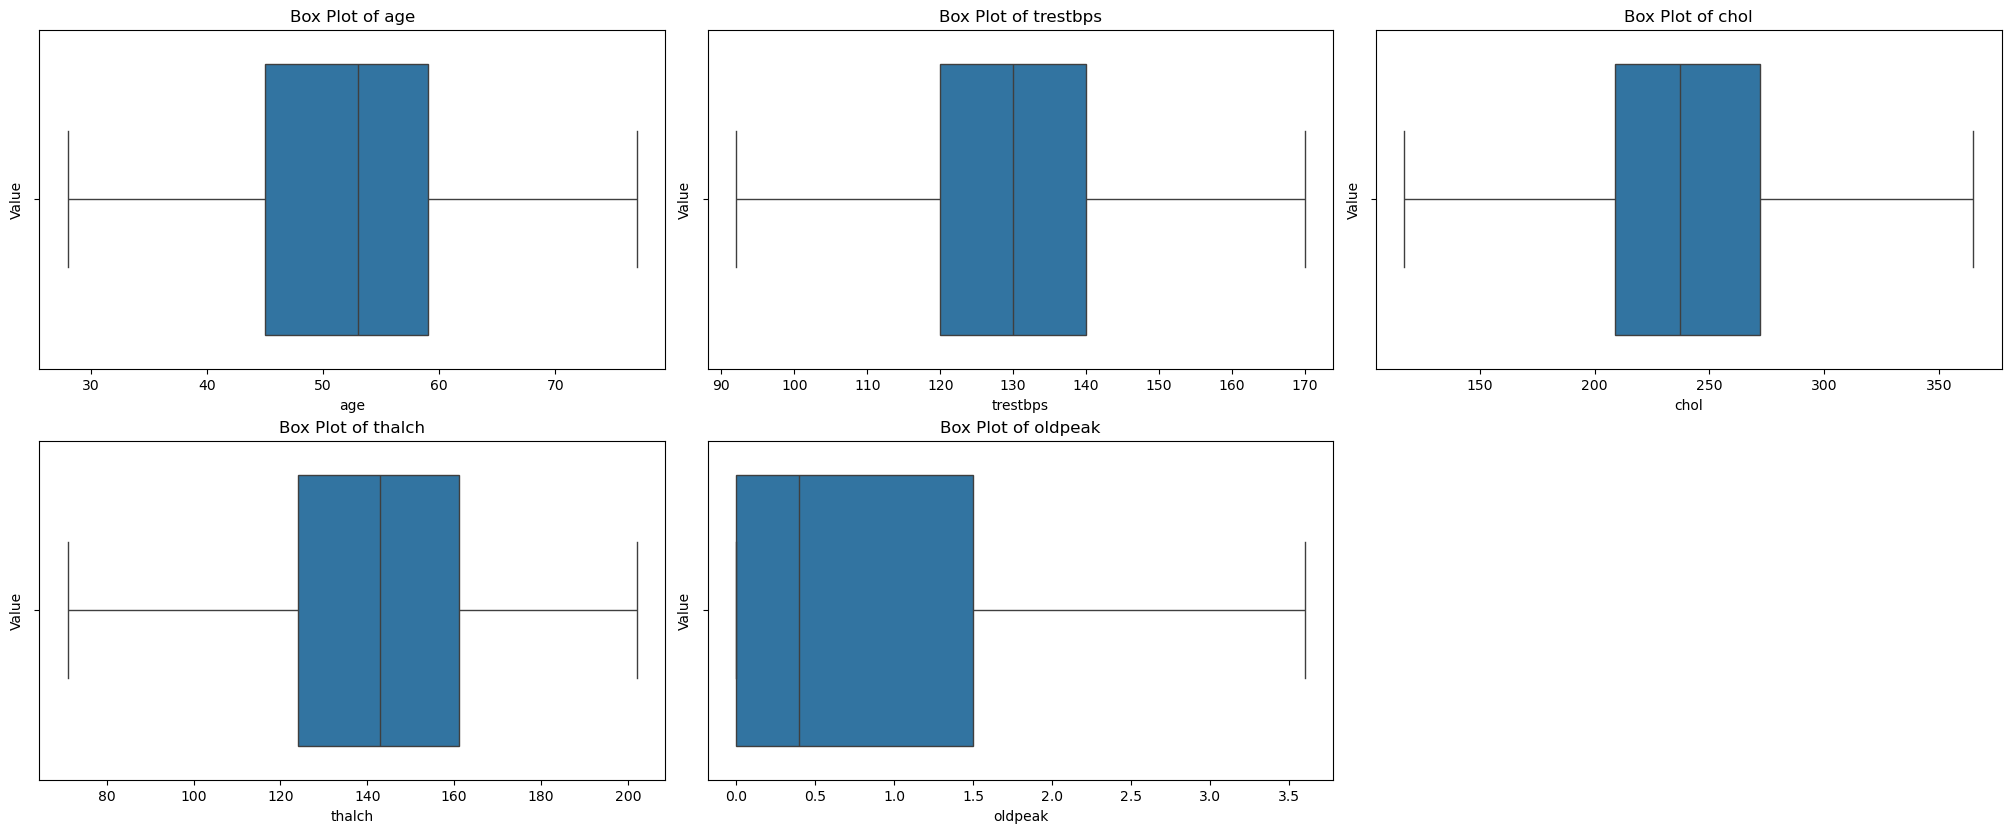

In [8]:
# The step of removing outliers
columns_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Function of removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_plot:
    kalp = remove_outliers(kalp, column)

# Redraw of box plots after removing outliers

kalp_selected = kalp[columns_to_plot]

num_cols = len(columns_to_plot)
rows = 4
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15), constrained_layout=True)

for i, column in enumerate(columns_to_plot):
    row = i // cols
    col = i % cols
    sns.boxplot(x=kalp_selected[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')

for i in range(num_cols, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


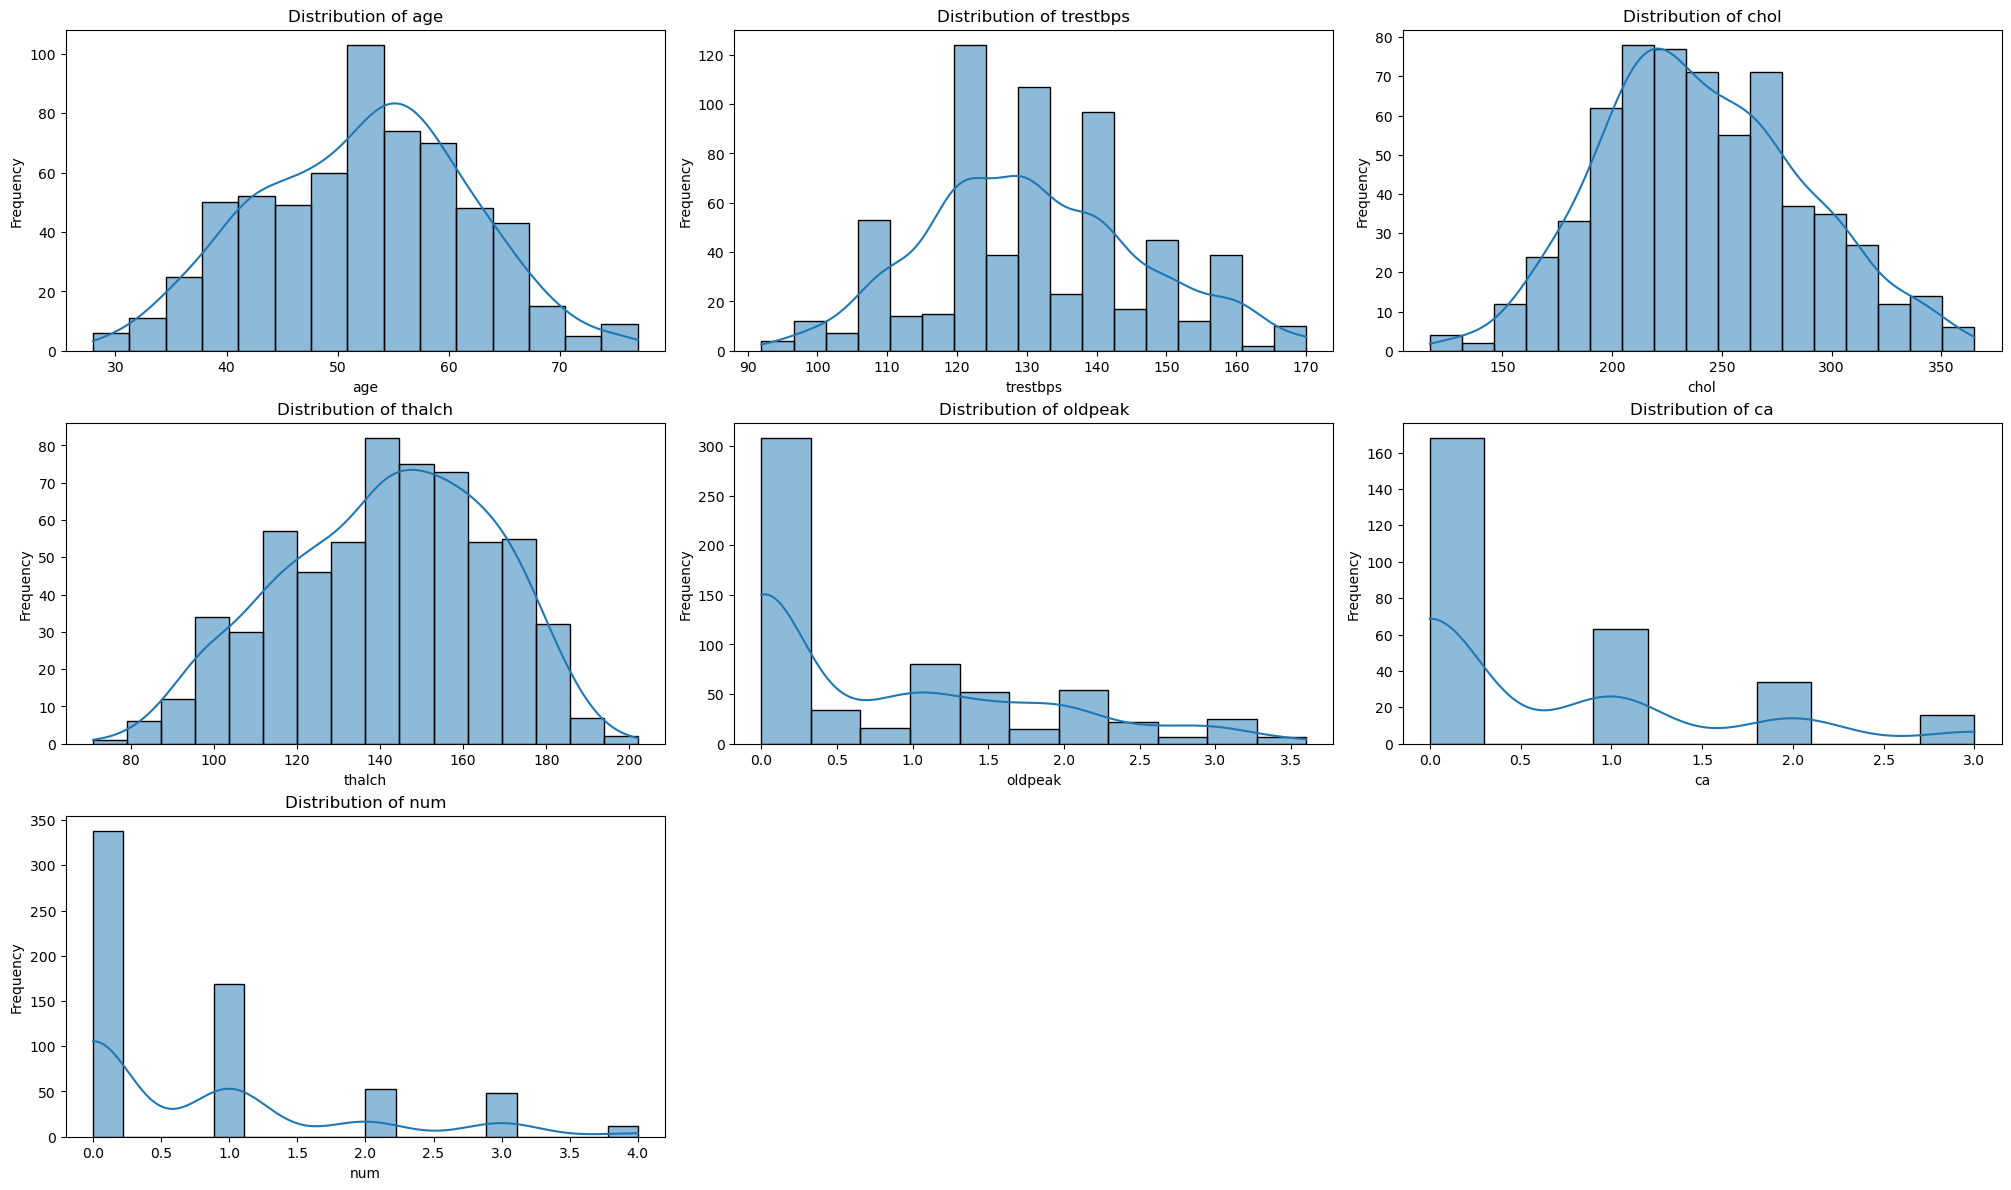

In [9]:
# The step of plotting the data distribution

columns_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

df_selected = kalp[columns_to_plot]


num_cols = len(columns_to_plot)
rows = 4
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15), constrained_layout=True)

for i, column in enumerate(columns_to_plot):
    row = i // cols
    col = i % cols
    sns.histplot(df_selected[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')


for i in range(num_cols, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [10]:
# Skewness identification
columns_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for column in columns_to_plot:
    skewness = kalp[column].skew()
    
    if skewness < -1.0:
        skewness_type = 'Highly Skewed (< -1.0): Data is highly asymmetrical with a long left tail.'
    elif skewness < -0.5:
        skewness_type = 'Moderate Negative Skew (-0.5 to -1.0): Data has a noticeable left tail, but not extreme.'
    elif skewness < 0.5:
        skewness_type = 'Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.'
    elif skewness < 1.0:
        skewness_type = 'Moderate Positive Skew (0.5 to 1.0): Data has a noticeable right tail, but not extreme.'
    else:
        skewness_type = 'Highly Skewed (> 1.0): Data is highly asymmetrical with a long right tail.'
    
    print(f"{column}: Skewness = {skewness:.2f}, Type = {skewness_type}")


age: Skewness = -0.05, Type = Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.
trestbps: Skewness = 0.27, Type = Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.
chol: Skewness = 0.23, Type = Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.
thalch: Skewness = -0.26, Type = Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.
oldpeak: Skewness = 0.93, Type = Moderate Positive Skew (0.5 to 1.0): Data has a noticeable right tail, but not extreme.


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 


In [11]:
#Trying to log transformation 

log_transformed = np.log(kalp["oldpeak"].replace(0, np.nan))  


columns_to_plot = ['oldpeak']

for column in columns_to_plot:
    skewness = kalp[column].skew()
    
    # Skewness aralıklarını belirle
    if skewness < -1.0:
        skewness_type = 'Highly Skewed (< -1.0): Data is highly asymmetrical with a long left tail.'
    elif skewness < -0.5:
        skewness_type = 'Moderate Negative Skew (-0.5 to -1.0): Data has a noticeable left tail, but not extreme.'
    elif skewness < 0.5:
        skewness_type = 'Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.'
    elif skewness < 1.0:
        skewness_type = 'Moderate Positive Skew (0.5 to 1.0): Data has a noticeable right tail, but not extreme.'
    else:
        skewness_type = 'Highly Skewed (> 1.0): Data is highly asymmetrical with a long right tail.'
    
    print(f"{column}: Skewness = {skewness:.2f}, Type = {skewness_type}")


oldpeak: Skewness = 0.93, Type = Moderate Positive Skew (0.5 to 1.0): Data has a noticeable right tail, but not extreme.


In [12]:
#Trying to sqrt transformation 

sqrt_transformed = np.sqrt(kalp["oldpeak"].replace(0, np.nan))


skewness = sqrt_transformed.skew()
    
if skewness < -1.0:
    skewness_type = 'Highly Skewed (< -1.0): Data is highly asymmetrical with a long left tail.'
elif skewness < -0.5:
    skewness_type = 'Moderate Negative Skew (-0.5 to -1.0): Data has a noticeable left tail, but not extreme.'
elif skewness < 0.5:
    skewness_type = 'Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.'
elif skewness < 1.0:
    skewness_type = 'Moderate Positive Skew (0.5 to 1.0): Data has a noticeable right tail, but not extreme.'
else:
    skewness_type = 'Highly Skewed (> 1.0): Data is highly asymmetrical with a long right tail.'
    
print(f"{column}: Skewness = {skewness:.2f}, Type = {skewness_type}")


oldpeak: Skewness = -0.26, Type = Fairly Symmetrical (-0.5 to 0.5): Data distribution is close to symmetrical, but might have slight deviations.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14924\1276766771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_transformed = sns.distplot(sqrt_transformed)


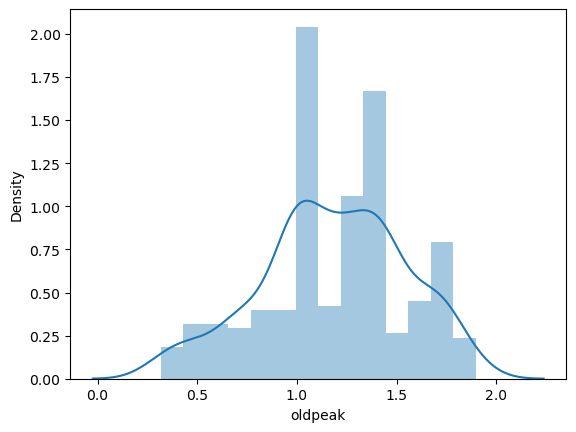

In [13]:
sp_transformed = sns.distplot(sqrt_transformed)  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14924\72883387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_transformed = sns.distplot(kalp["oldpeak"])


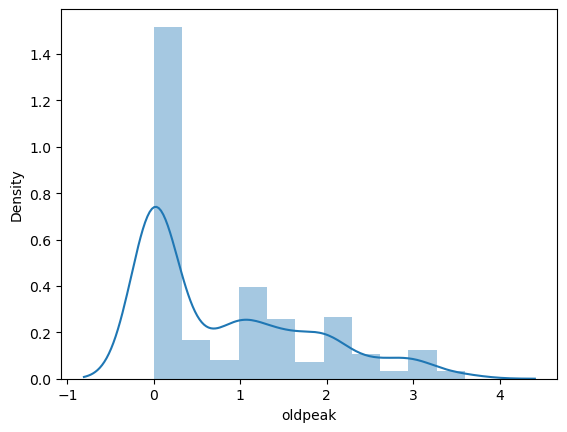

In [14]:
sp_transformed = sns.distplot(kalp["oldpeak"])

In [15]:
kalp["oldpeak"] = np.sqrt(kalp["oldpeak"].replace(0, np.nan))


In [16]:
kalp

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,1.516575,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.224745,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,1.612452,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,1.870829,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.183216,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,NaN,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,NaN,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,NaN,NaN,NaN,NaN,1
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,NaN,NaN,NaN,fixed defect,2


In [17]:
kalp3 = kalp.drop(columns=['id'])


In [ ]:
numeric_kalp3 = kalp3.select_dtypes(include=[np.number])


In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(numeric_kalp3.corr(), annot=True, cmap='RdYlGn')
plt.show()

### One hot encoding 

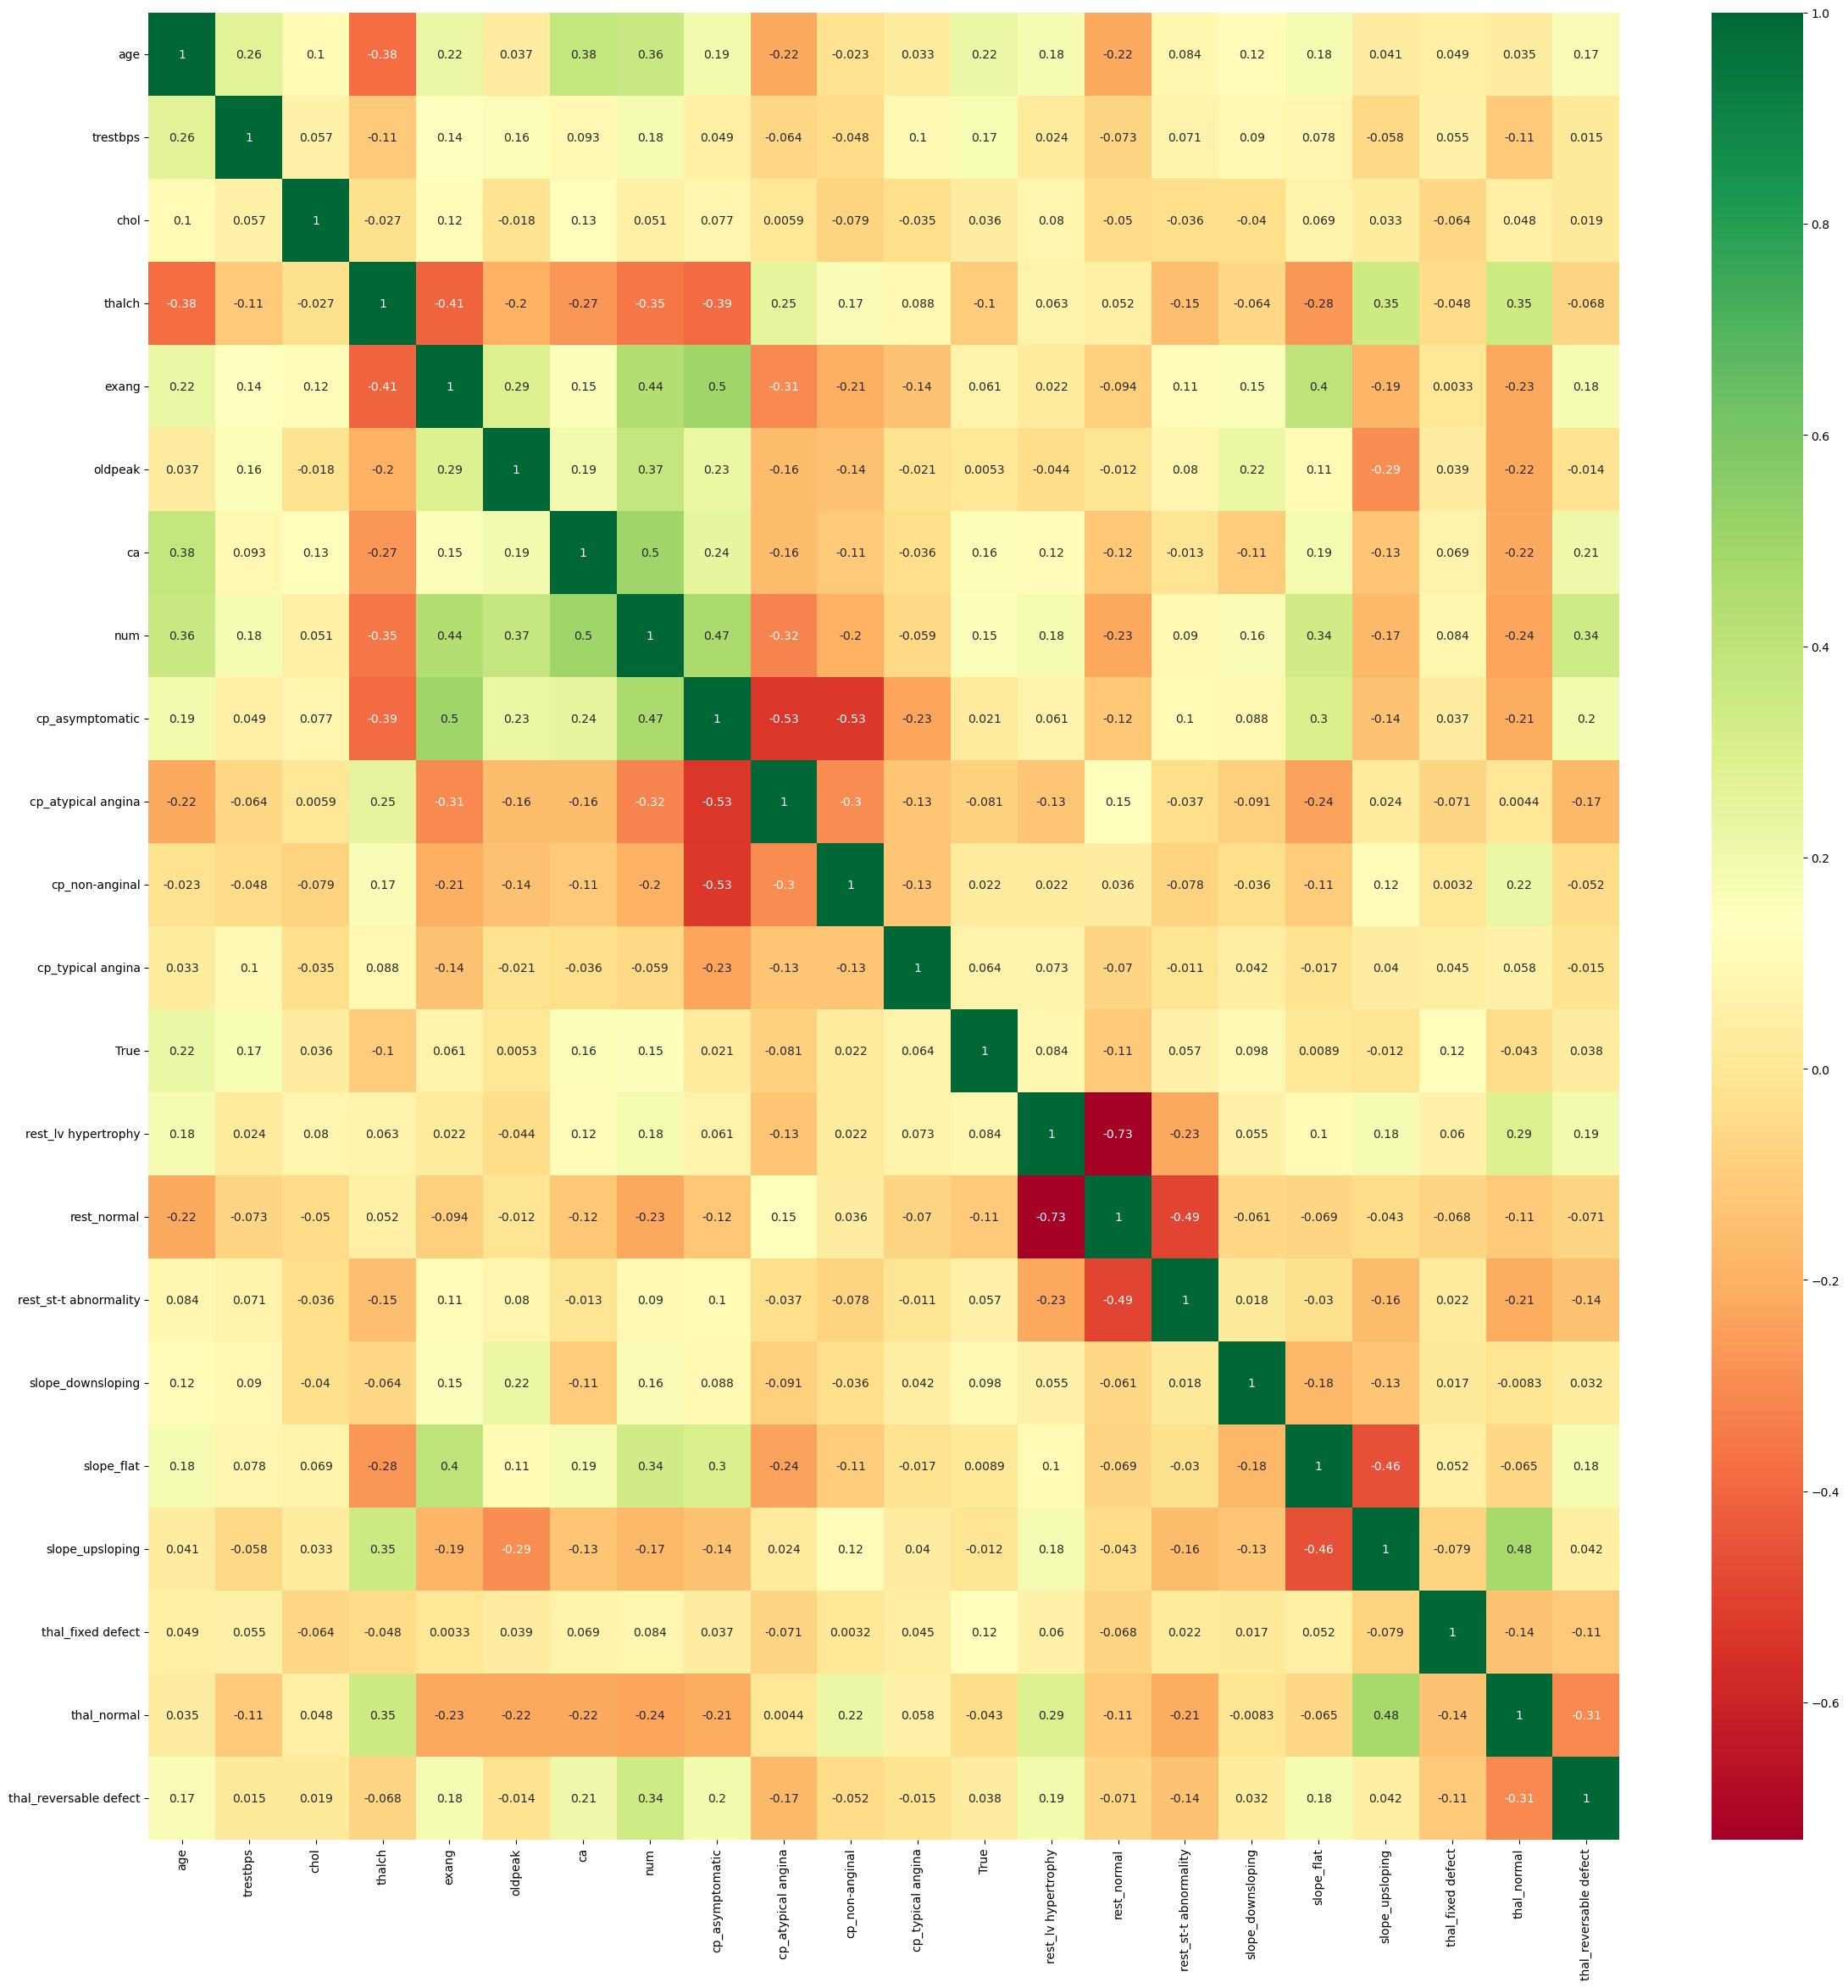

In [20]:

kalp_encoded2 = pd.get_dummies(kalp3, columns=['sex'], drop_first=True)


numeric_kalp4 = kalp_encoded2.select_dtypes(include=[np.number])

cp_dummies = pd.get_dummies(kalp_encoded2['cp'], prefix='cp')

cp_dummies = cp_dummies.astype(int)

kalp_encoded3 = pd.concat([kalp_encoded2, cp_dummies], axis=1)

numeric_kalp5 = kalp_encoded3.select_dtypes(include=[np.number])


fbs_dummies = pd.get_dummies(kalp_encoded2['fbs'], drop_first=True)
restecg_dummies = pd.get_dummies(kalp_encoded2['restecg'], prefix='rest')
slope_dummies = pd.get_dummies(kalp_encoded2['slope'], prefix='slope')
thal_dummies = pd.get_dummies(kalp_encoded2['thal'], prefix='thal')



encoded_columns = pd.concat([fbs_dummies, restecg_dummies, slope_dummies, thal_dummies], axis=1)



# True/False'ları 1 ve 0'lara çevirme (zaten get_dummies bunu yapar)
encoded_columns = encoded_columns.fillna(0)
encoded_columns = encoded_columns.astype(int)


# One-hot encoded sütunları veri çerçevesine ekleme
kalp_encoded4 = pd.concat([kalp_encoded3, encoded_columns], axis=1)

kalp_encoded4['exang'] = kalp_encoded4['exang'].astype(int)


kalp_encoded5 = kalp_encoded4.select_dtypes(include=[np.number])


plt.figure(figsize=(28, 28))
sns.heatmap(kalp_encoded5.corr(), annot=True, cmap='RdYlGn')

# PNG olarak 300 DPI ile kaydet
plt.savefig('heatmap.png', dpi=300, format='png', bbox_inches='tight')
# Korelasyon matrisini hesaplama
corr_matrix = kalp_encoded5.corr()

# 'num' kolonuyla diğer kolonlar arasındaki korelasyonları çekme
num_corr = corr_matrix['num'].drop('num')  # Kendisiyle olan korelasyonu kaldır

# Korelasyon aralıklarını tanımlama
def classify_correlation(value):
    if abs(value) < 0.1:
        return "Çok Zayıf"
    elif abs(value) < 0.3:
        return "Zayıf"
    elif abs(value) < 0.5:
        return "Orta"
    elif abs(value) < 0.7:
        return "Güçlü"
    else:
        return "Çok Güçlü"

# Korelasyonları sınıflandırma
correlation_groups = {
    "Çok Zayıf": [],
    "Zayıf": [],
    "Orta": [],
    "Güçlü": [],
    "Çok Güçlü": []
}

for col, corr_value in num_corr.items():
    correlation_class = classify_correlation(corr_value)
    correlation_groups[correlation_class].append((col, corr_value))

# Sonuçları ekrana yazdırma
for category, pairs in correlation_groups.items():
    print(f"\n{category} Korelasyon:")
    for col, value in pairs:
        print(f"{col}: {value:.2f}")



In [25]:
# Korelasyon matrisini hesaplama
corr_matrix = kalp_encoded5.corr()

# 'num' kolonuyla diğer kolonlar arasındaki korelasyonları çekme
num_corr = corr_matrix['num'].drop('num')  # Kendisiyle olan korelasyonu kaldır

# Korelasyon aralıklarını tanımlama
def classify_correlation(value):
    if abs(value) < 0.1:
        return "very weak"
    elif abs(value) < 0.3:
        return "weak"
    elif abs(value) < 0.5:
        return "moderate"
    elif abs(value) < 0.7:
        return "strong"
    else:
        return "very strong"

# Korelasyonları sınıflandırma
correlation_groups = {
    "very weak": [],
    "weak": [],
    "moderate": [],
    "strong": [],
    "very strong": []
}

for col, corr_value in num_corr.items():
    correlation_class = classify_correlation(corr_value)
    correlation_groups[correlation_class].append((col, corr_value))

# Sonuçları ekrana yazdırma
for category, pairs in correlation_groups.items():
    print(f"\n{category} Korelasyon:")
    for col, value in pairs:
        print(f"{col}: {value:.2f}")



very weak Korelasyon:
chol: 0.05
cp_typical angina: -0.06
rest_st-t abnormality: 0.09
thal_fixed defect: 0.08

weak Korelasyon:
trestbps: 0.18
cp_non-anginal: -0.20
True: 0.15
rest_lv hypertrophy: 0.18
rest_normal: -0.23
slope_downsloping: 0.16
slope_upsloping: -0.17
thal_normal: -0.24

moderate Korelasyon:
age: 0.36
thalch: -0.35
exang: 0.44
oldpeak: 0.37
ca: 0.50
cp_asymptomatic: 0.47
cp_atypical angina: -0.32
slope_flat: 0.34
thal_reversable defect: 0.34

strong Korelasyon:

very strong Korelasyon:


In [33]:
# Determining the Significance Level
correlation_matrix = kalp_encoded5.corr()

num_correlation = correlation_matrix['num'].drop('num')

def correlation_group(corr_value):
    abs_corr = abs(corr_value)
    if 0.7 < abs_corr <= 1.0:
        return 'Çok güçlü korelasyon'
    elif 0.5 <= abs_corr <= 0.7:
        return 'Güçlü korelasyon'
    elif 0.3 <= abs_corr < 0.5:
        return 'Orta derecede korelasyon'
    else:
        return None

significant_columns = num_correlation[num_correlation.apply(correlation_group).notnull()].index

continuous_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca','exang','cp_asymptomatic','cp_atypical angina','slope_flat','thal_reversable defect']

for column in significant_columns:
    if column in continuous_columns:
        group1 = kalp_encoded5[kalp_encoded5['num'] == 1][column]
        group2 = kalp_encoded5[kalp_encoded5['num'] == 2][column]

        # t-testi
        t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())

        print(f'Column: {column}')
        print(f't-istatistiği: {t_stat}')
        print(f'p-değeri: {p_value}')

        alpha = 0.05
        if p_value < alpha:
            print(f"H1: There is a significant relationship between `{column}` and `num` (p-value: {p_value:.4f}). The correlation is statistically significant.")
        else:
            print(f"H0: There is no significant relationship between `{column}` and `num` (p-value: {p_value:.4f}). The correlation is not statistically significant.")
        print()



Column: age
t-istatistiği: -5.088667963815539
p-değeri: 7.724006271698543e-07
H1: There is a significant relationship between `age` and `num` (p-value: 0.0000). The correlation is statistically significant.

Column: thalch
t-istatistiği: 0.8954453108070783
p-değeri: 0.371527765154814
H0: There is no significant relationship between `thalch` and `num` (p-value: 0.3715). The correlation is not statistically significant.

Column: exang
t-istatistiği: -0.9661223312418947
p-değeri: 0.3350437955819495
H0: There is no significant relationship between `exang` and `num` (p-value: 0.3350). The correlation is not statistically significant.

Column: oldpeak
t-istatistiği: -1.6381215155176765
p-değeri: 0.1033862815563
H0: There is no significant relationship between `oldpeak` and `num` (p-value: 0.1034). The correlation is not statistically significant.

Column: ca
t-istatistiği: -2.3559160083510933
p-değeri: 0.020806340834684592
H1: There is a significant relationship between `ca` and `num` (p-val

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14924\614559842.py:27: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())


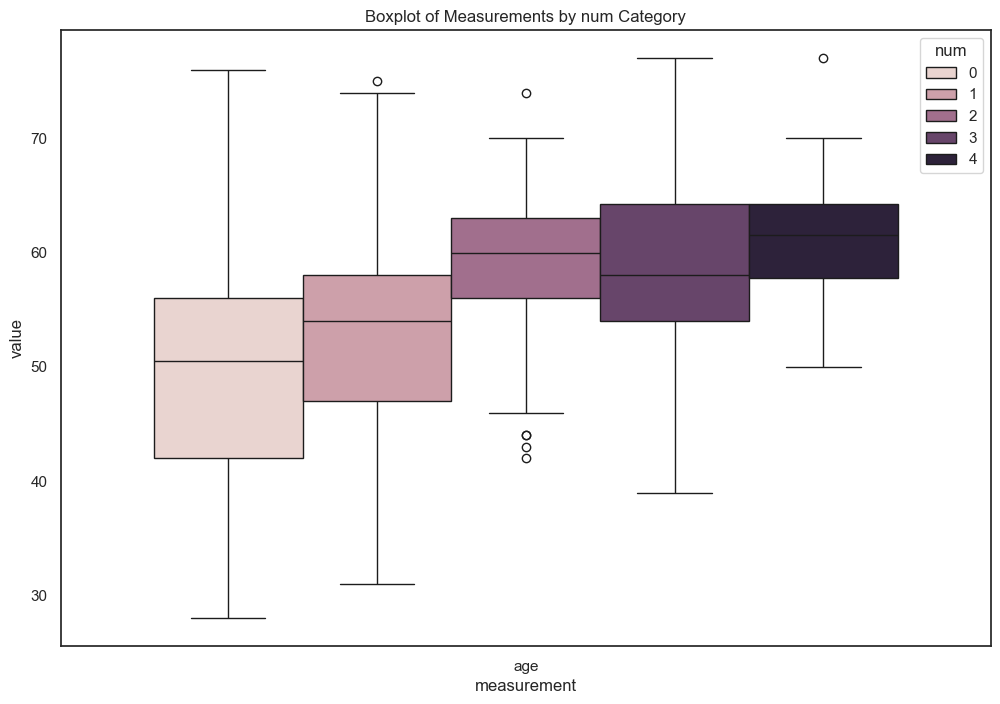

In [34]:
columns_to_plot = [ 'age']

plot_data = kalp_encoded5.melt(id_vars='num', value_vars=columns_to_plot, var_name='measurement', value_name='value')

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

plt.figure(figsize=(12, 8))
sns.boxplot(x='measurement', y='value', hue='num', data=plot_data)
plt.title('Boxplot of Measurements by num Category')
plt.show()


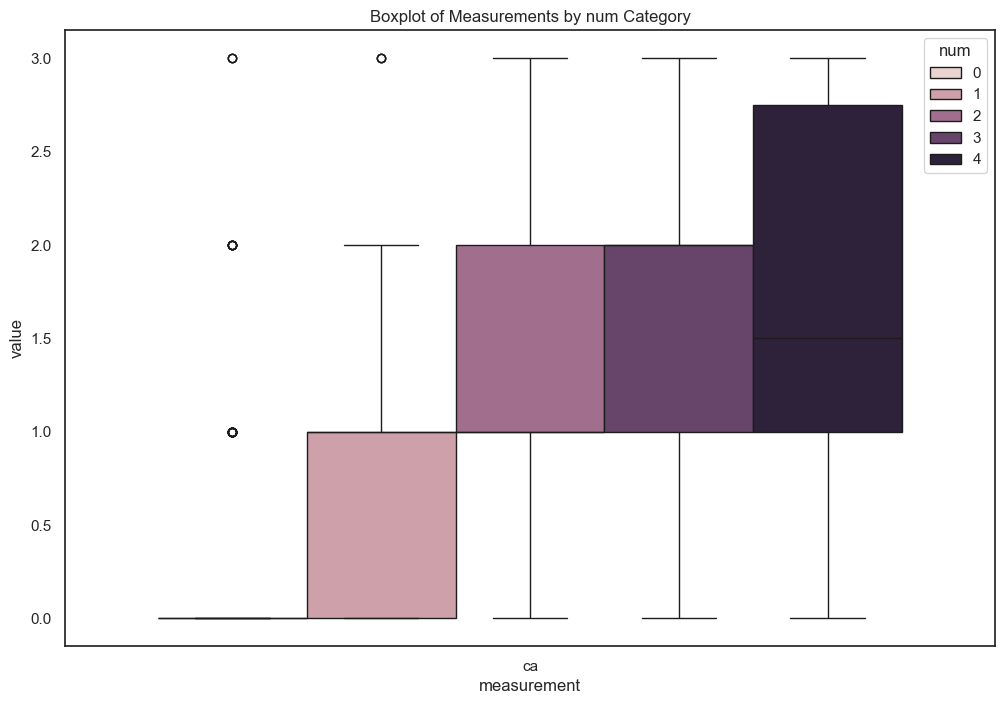

In [35]:
columns_to_plot = [ 'ca']

plot_data = kalp_encoded5.melt(id_vars='num', value_vars=columns_to_plot, var_name='measurement', value_name='value')

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

plt.figure(figsize=(12, 8))
sns.boxplot(x='measurement', y='value', hue='num', data=plot_data)
plt.title('Boxplot of Measurements by num Category')
plt.show()


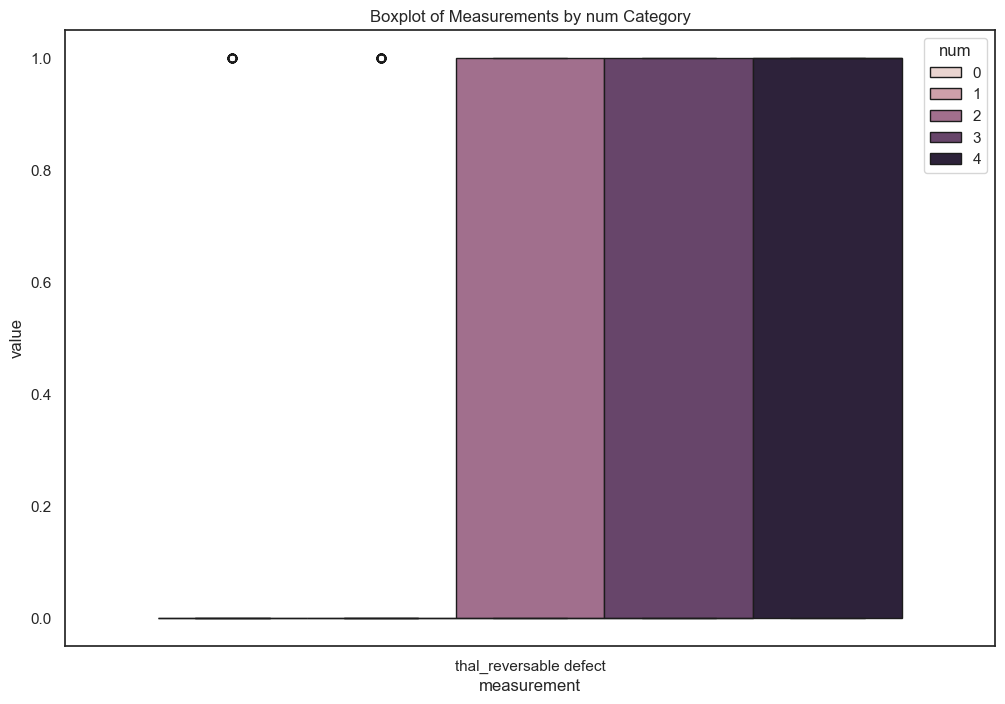

In [36]:
columns_to_plot = [ 'thal_reversable defect']

plot_data = kalp_encoded5.melt(id_vars='num', value_vars=columns_to_plot, var_name='measurement', value_name='value')

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

plt.figure(figsize=(12, 8))
sns.boxplot(x='measurement', y='value', hue='num', data=plot_data)
plt.title('Boxplot of Measurements by num Category')
plt.show()
